In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("husl")

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

df = pd.read_csv('Data/DA314_S9_EmployeePerformance_Data_Concept.csv')

print("Dataset Info:")
print("-" * 50)
df.info()
print("\nSample of the data:")
print("-" * 50)
df.head()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   department                    54808 non-null  object 
 2   region                        54808 non-null  object 
 3   education                     54808 non-null  object 
 4   gender                        54808 non-null  object 
 5   recruitment_channel           54808 non-null  object 
 6   no_of_trainings               54808 non-null  int64  
 7   age                           54808 non-null  int64  
 8   previous_year_rating          54808 non-null  float64
 9   length_of_service             54808 non-null  int64  
 10  awards_won                    54808 non-null  int64  
 11  avg_training_score            54808 non-null  float64


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,performance_score,years_since_last_promotion,is_eligible_for_promotion,experience_level,training_effectiveness_ratio,is_promoted_text,age_group
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0,57.9,2,0,Senior,49,Not Promoted,26-35
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0,66.5,2,1,Mid-Level,60,Not Promoted,26-35
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0,52.8,5,0,Mid-Level,50,Not Promoted,26-35
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0,36.3,2,0,Senior,25,Not Promoted,36-45
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0,69.2,2,0,Entry-Level,73,Not Promoted,36-45


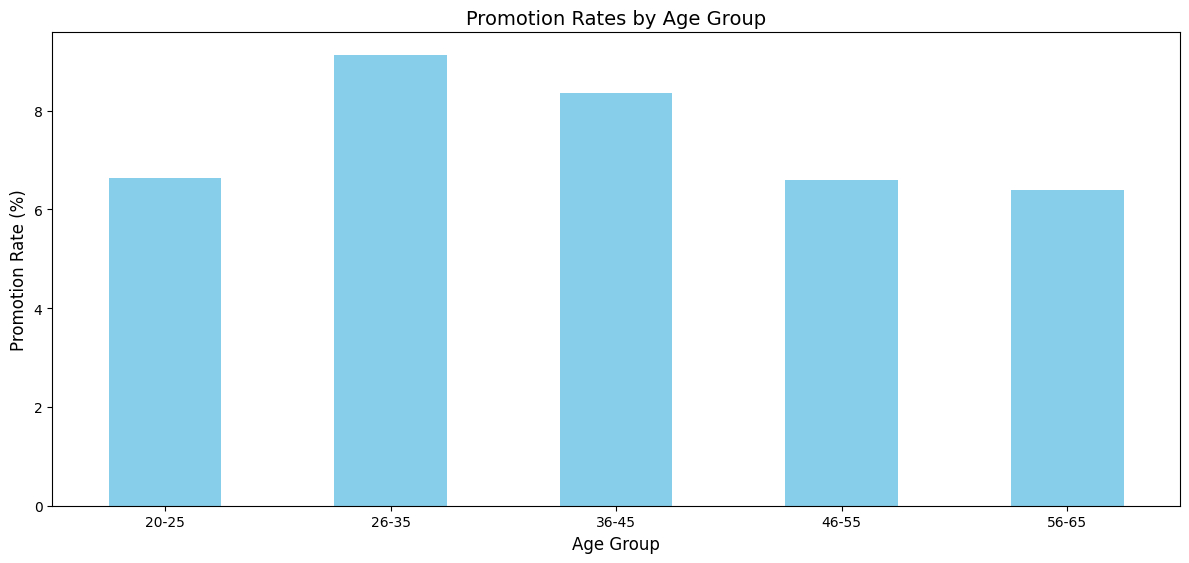

In [41]:
promotion_by_age = df.groupby('age_group')['is_promoted'].mean() * 100

plt.figure(figsize=(12, 6))
ax = promotion_by_age.plot(kind='bar' , color = 'skyblue')
plt.title('Promotion Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Promotion Rate (%)')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


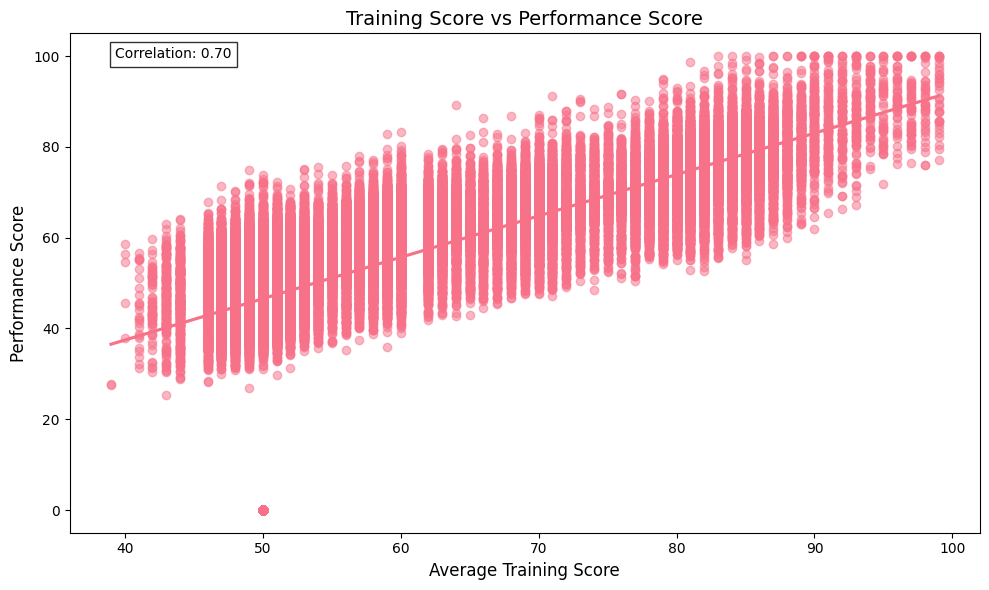

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='avg_training_score', y='performance_score', scatter_kws={'alpha':0.5})
plt.title('Training Score vs Performance Score')
plt.xlabel('Average Training Score')
plt.ylabel('Performance Score')

correlation = df['avg_training_score'].corr(df['performance_score'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

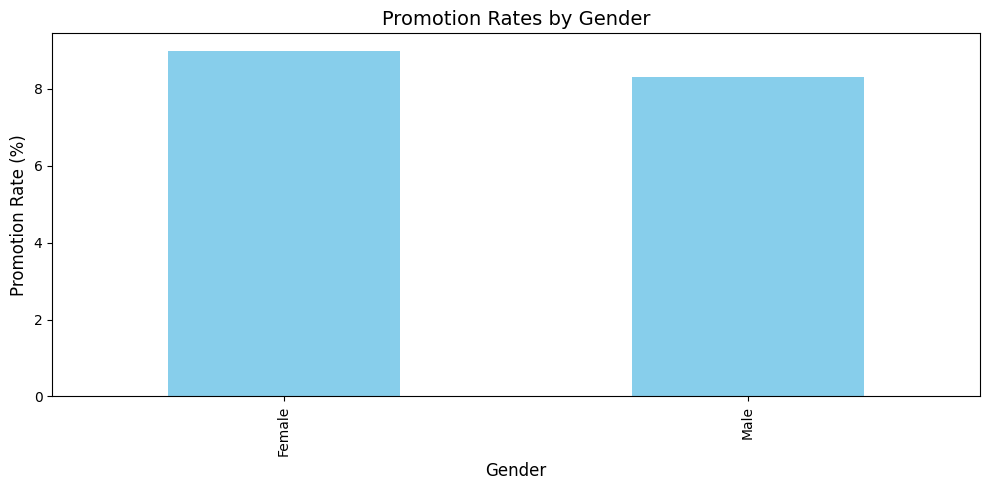

In [35]:
promotion_by_gender = df.groupby('gender')['is_promoted'].mean() * 100
df['gender'] = df['gender'].map({'f': 'Female', 'm': 'Male'})
plt.figure(figsize=(10, 5))
ax = promotion_by_gender.plot(kind='bar' , color = 'skyblue')
plt.title('Promotion Rates by Gender') 
plt.xlabel('Gender')
plt.ylabel('Promotion Rate (%)')
plt.tight_layout()
plt.show()


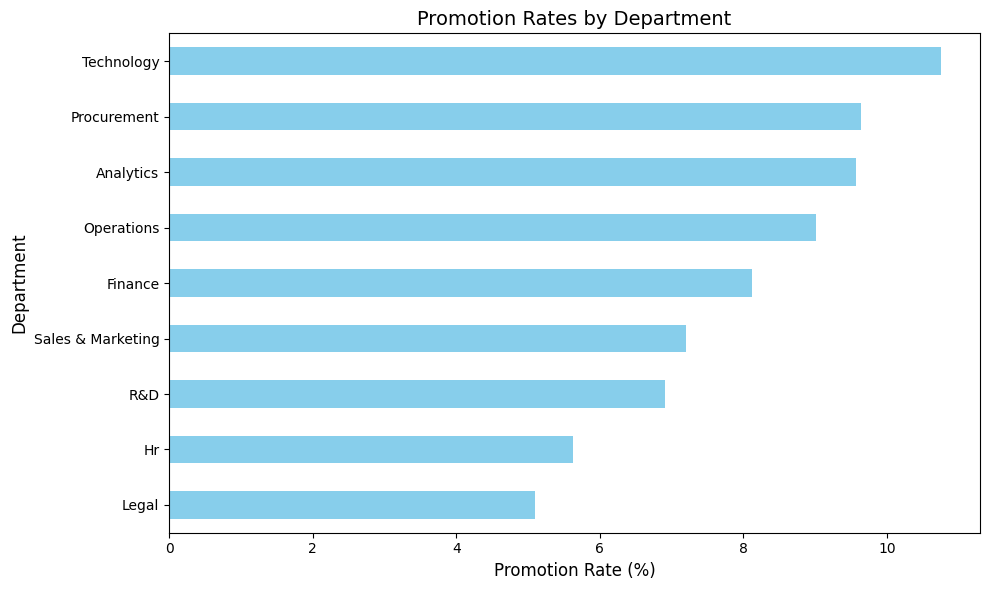

In [26]:
promotion_by_dept = df.groupby('department')['is_promoted'].mean() * 100
promotion_by_dept = promotion_by_dept.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = promotion_by_dept.plot(kind='barh' , color = 'skyblue')
plt.title('Promotion Rates by Department')
plt.xlabel('Promotion Rate (%)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


C:\Users\madha\AppData\Local\Temp\ipykernel_4820\250832360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='avg_training_score' , palette=colors)


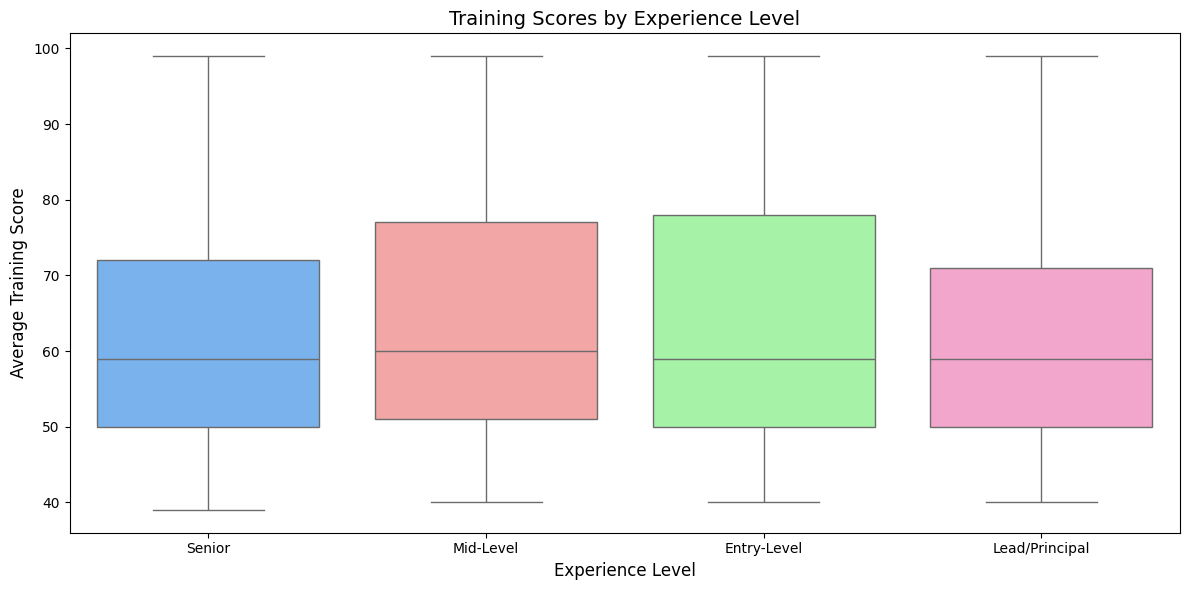

In [34]:
plt.figure(figsize=(12, 6))
colors = ['#66B2FF', '#FF9999','#99FF99',  '#FF99CC']
sns.boxplot(data=df, x='experience_level', y='avg_training_score' , palette=colors)
plt.title('Training Scores by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Training Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
